# S04T01: Transformacio Registre Log amb Regex.

## - Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu <b>"Web_access_log-akumenius.com"</b> que trobaràs al repositori de GitHub "Data-sources".

<font color='blue'>Let's start by taking a quick look at the raw data, trying to understand what does contain and the rough structure:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

raw_df = pd.read_csv(r'Web_access_log-akumenius.com.txt', error_bad_lines=False, header=None, names=["Raw data"])
pd.set_option('display.max_colwidth', None)
raw_df.head(10)

,Raw data
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
5,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
6,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
7,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
8,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
9,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"


<font color='blue'>Let's now take the first row and try to map how the data is structured:</font>
    
localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] 
200 - "-" "Apache (internal dummy connection)" VLOG=-

<font color='blue'> It seems the data is saved in <b>NSCA Common log format</b>:</font> host + ident + authuser + date + request + status + bytes <font color='blue'><br>Parting from the entire row, we'll split it to understand each embedded concept:</font> <br><br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; localhost 127.0.0.1<font color='blue'> =    host address from which the web was accessed  <br> <br> </font> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - - <font color='blue'>=   separator  <br><br> </font>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [23/Feb/2014:03:10:31 +0100]<font color='blue'> = date:time and time zone of the register  <br> <br> </font>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; "OPTIONS * HTTP/1.0"<font color='blue'> = user request (method / resource / HTTP protocol)  <br><br> </font>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 200 -<font color='blue'> = HTTP status code (2xx is a successful response, 3xx a redirection, 4xx a client error, and 5xx a server error) / size of object returned (bytes) <br><br> </font>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; "-" <font color='blue'> = separator  <br><br> </font>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; "Apache (internal dummy connection)" -<font color='blue'> = user_agent browser engine <br><br> </font>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; VLOG=- -<font color='blue'> =  ????? <br><br> </font>

<font color='blue'>So the structure we will use to transpose the data into a pandas dataframe will be structured as this:
<br><br></font>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [host] + [IP] + [geolocation] + [date] + [time] + [zone] + [request] + [resource] + [status_code] + [obj_size] + [browser]

## - Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.
<font color='blue'>
    
<br>Let's load again the dataset but this time we'll directly save it as a dataframe:

In [4]:
pattern=r'([a-zA-Z0-9._-]+) ([0-9._-]+) - - \[(.+):(.*:.*:.*) \+(0100)\] \"([a-zA-Z]*) \S(.*?) .*[0-9]" ([0-9]*) ([0-9]*).*" "([a-zA-Z0-9]*)'
file_link=r'Web_access_log-akumenius.com.txt'

webreg = pd.read_csv(file_link, delimiter=pattern, na_values="-", header=None, engine='python',
names=["host","IP","date","time","zone", "request","resource","status_code","obj_size","browser", "rest"])

pd.set_option('display.max_colwidth', None)
webreg.reset_index(drop=True, inplace=True)
webreg.drop(["rest", "zone"], axis=1, inplace=True)
webreg.sample(3)

,host,IP,date,time,request,resource,status_code,obj_size,browser
148788,www.akumenius.com,84.122.139.8,26/Feb/2014,02:09:00,GET,libraries/jqueryui/js/jquery.ui.core.min.js,200.0,4365.0,Mozilla
58239,www.akumenius.com,180.76.6.53,24/Feb/2014,12:35:12,GET,destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Cerde%C3%B1a-Sur_ITALIA-con-Chiringuito-de-piscina,200.0,7180.0,Mozilla
28442,www.akumenius.com,66.249.76.216,23/Feb/2014,18:51:02,GET,destinos-caracteristicas/hoteles-baratos-en-Cesson_FRANCIA-con-Parking-para-autocares,200.0,8201.0,Mozilla


<font color='blue'>We've used the power of regular expressions to find concepts in the dataset and save it well structured in a dataframe using only a couple of code lines.<br>
Let's dig our hands into the first layer of information that the dataframe provides us:

In [5]:
webreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   host         261804 non-null  object 
 1   IP           261804 non-null  object 
 2   date         261804 non-null  object 
 3   time         261804 non-null  object 
 4   request      261804 non-null  object 
 5   resource     243854 non-null  object 
 6   status_code  261804 non-null  float64
 7   obj_size     219506 non-null  float64
 8   browser      261625 non-null  object 
dtypes: float64(2), object(7)
memory usage: 18.0+ MB


<font color='blue'>We can deep dive into the unique values of each attribute to get an idea of the depth of the data:

In [6]:
print("host: ", webreg.host.unique())
print("\nIP: ", webreg.IP.nunique())
print("\ndate: ", webreg.date.unique())
print("\ntime: ", webreg.time.nunique())
print("\nrequest: ", webreg.request.unique())
print("\nresource: ", webreg.resource.nunique())
print("\nstatus_code: ", webreg.status_code.unique())
print("\nobj_size: ", webreg.obj_size.nunique())
print("\nbrowser: ", webreg.browser.nunique())

host:  ['localhost' 'www.akumenius.com' 'akumenius.com' 'akumenius.es' None
 'test.akumenius.com']

IP:  2920

date:  ['23/Feb/2014' None '24/Feb/2014' '25/Feb/2014' '26/Feb/2014'
 '27/Feb/2014' '28/Feb/2014' '01/Mar/2014' '02/Mar/2014']

time:  66630

request:  ['OPTIONS' 'GET' 'HEAD' 'POST' None]

resource:  66069

status_code:  [200. 404. 304. 502. 301. 403.  nan 400. 206. 401. 302. 500.]

obj_size:  15538

browser:  45


<font color='blue'>Let's focus on the 'date' column. We start by formating the date from `object` to `datetime64`.

In [7]:
webreg.date = pd.to_datetime(webreg.date, format="%d/%b/%Y")
webreg.date.value_counts()

2014-02-25    55790
2014-02-24    48823
2014-02-27    41497
2014-02-23    40533
2014-02-26    36464
2014-02-28    19567
2014-03-01    17746
2014-03-02     1384
Name: date, dtype: int64

<font color='blue'>We can now assert that the register includes data from the 25/02 until the 02/03 of 2014, both included. So we'll be studying the data of the login registers into the webpage for the period of 1 week. From this point, let's try and figure out how did the logins ditribute along the week:

/var/folders/xh/mkk0g6yn1sb9xntn6w3ggpvw0000gp/T/ipykernel_5735/762535172.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["23/03","24/03","25/02","26/02","27/02","28/02","01/03","02/03"], rotation=45)
/var/folders/xh/mkk0g6yn1sb9xntn6w3ggpvw0000gp/T/ipykernel_5735/762535172.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["23/03","24/03","25/02","26/02","27/02","28/02","01/03","02/03"], rotation=45)


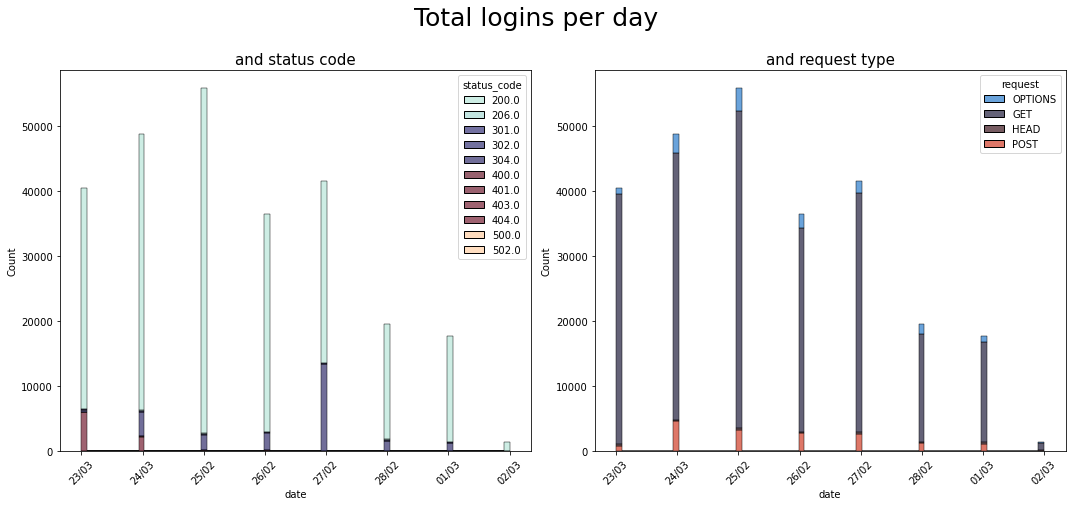

In [8]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.suptitle("Total logins per day", fontsize=25, y=1.0)

#plot 1
ax1 = sns.histplot(data=webreg, x="date", hue="status_code", multiple="stack", palette="icefire", ax=axes[0])
ax1.set_xticklabels(["23/03","24/03","25/02","26/02","27/02","28/02","01/03","02/03"], rotation=45)
ax1.set_title("and status code", fontsize=15)

#plot2
ax2 = sns.histplot(data=webreg, x="date", hue="request", multiple="stack", palette="icefire", ax=axes[1])
ax2.set_xticklabels(["23/03","24/03","25/02","26/02","27/02","28/02","01/03","02/03"], rotation=45)
ax2.set_title("and request type", fontsize=15)

plt.tight_layout()
plt.show()

<font color='blue'>As we can perceive, the higher amount of logins has been registered in the first half of the week, with a substantial decrease the last three days. We can also see that there's been a spike of errors to access the website the first two days (status codes 400, 401, 403, 404). <br> On the other hand, the major part of requests to the website were GETs.

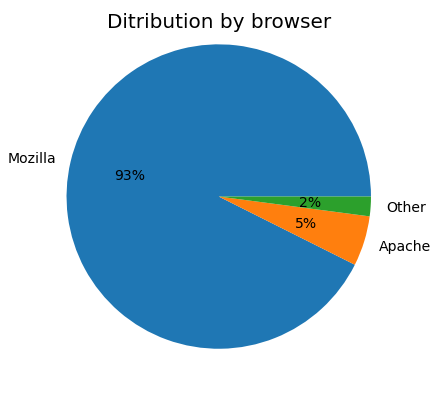

In [9]:
plt.figure(figsize=(7,7))
o=webreg.browser.value_counts()
x=[o.index[0], o.index[1], "Other"]
y=np.array([o[0], o[1], o[2:].sum()])
plt.pie(y, labels=x, autopct='%1.0f%%',textprops={'fontsize': 14}, wedgeprops = {'linewidth': 0},startangle = 0)
plt.title("Ditribution by browser", fontsize=20, y=0.93)
plt.show()

<font color='blue'>Apparently the vast majority of logins came from the Mozilla browser engine. Only a 7% represents other browsers. <br><br>
Now we want to explore the data related to the IP of the user.

In [10]:
print("Total different IPs: ", webreg.IP.nunique())
print("\nSamples: \n", webreg.IP.sample(5))

Total different IPs:  2920

Samples: 
 56629     195.235.177.135
99703        88.14.201.73
116483      66.249.76.216
171018     217.125.71.222
254996       88.6.202.244
Name: IP, dtype: object


## - Exercici 3
Geolocalitza les IP's.

<font color='blue'>We can't tell much about the IPs with its original format, but we could use it to extract the geolocation of the user by the time of the login. For this we'll need to import the module `ip2geotools` and convert each IP to geolocation paramaters.

In [32]:
from ip2geotools.databases.noncommercial import DbIpCity     
web2 = pd.DataFrame(webreg["IP"].sample(100))
web2 = web2[web2["IP"]!= "127.0.0.1"]
web2 = web2.groupby("IP").count().reset_index()

web2["city"] = web2["IP"].apply(lambda x: DbIpCity.get(x, api_key='free').city)
web2["region"] = web2["IP"].apply(lambda x: DbIpCity.get(x, api_key='free').region)
web2["country"] = web2["IP"].apply(lambda x: DbIpCity.get(x, api_key='free').country)
web2["latitude"] = web2["IP"].apply(lambda x: DbIpCity.get(x, api_key='free').latitude)
web2["longitude"] = web2["IP"].apply(lambda x: DbIpCity.get(x, api_key='free').longitude)

web2

,IP,city,region,country,latitude,longitude
0,144.76.95.232,Falkenstein,Saxony,DE,50.535392,12.664384
1,147.86.207.241,Windisch,Aargau,CH,47.479347,8.217992
2,150.214.144.128,Seville,Andalusia,ES,37.388630,-5.995340
3,157.55.36.50,Toronto,Ontario,CA,43.653482,-79.383935
4,162.243.192.191,New York,New York,US,40.712728,-74.006015
...,...,...,...,...,...,...
64,90.174.1.32,Pozuelo de Alarcón,Madrid,ES,40.434653,-3.814834
65,91.117.177.64,Vigo,Galicia,ES,42.237660,-8.724721
66,95.17.185.119,Pozuelo de Alarcón,Madrid,ES,40.434653,-3.814834
67,95.172.74.37,Kingston upon Thames,England,GB,51.409627,-0.306262


<font color='blue'>We had to reduce the weight of the dataframe by ignoring the host IP (127.0.0.1) and keeping only unique values. We've also opted for taking just a sample of all the IPs in order to be able to run the functions with a much more lighter dataset. Otherwise the CPU may have issues to process such a vast amount of data.

## - Exercici 4
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

<font color='blue'>Let's investigate a bit deeper the information we can draw from the IPs.

In [99]:
#web2 = web2.set_index("IP")
print("List of countries: ", web2.country.unique())
print("\nList of regions: \n", web2.region.unique())
print("\nList of cities: \n", web2.city.unique())

List of countries:  ['DE' 'CH' 'ES' 'CA' 'US' 'FR' 'CN' 'EC' 'VG' 'SE' 'GB']

List of regions: 
 ['Saxony' 'Aargau' 'Andalusia' 'Ontario' 'New York' 'Hauts-de-France'
 'Madrid' 'Beijing' 'Napo' 'District of Columbia' 'Extremadura'
 'Castille and León' 'Catalonia' 'Galicia' 'Tortola' 'Stockholm'
 'New Jersey' 'California' 'Illinois' 'Valencia' 'Murcia' 'Basque Country'
 'Zurich' 'England']

List of cities: 
 ['Falkenstein' 'Windisch' 'Seville' 'Toronto' 'New York' 'Roubaix'
 'Madrid' 'Beijing' 'Tena' 'Pozuelo de Alarcón' 'Washington D.C.'
 'Lavapiés' 'Badajoz' 'Valladolid' 'Barcelona' 'Lleida' 'Vigo' 'Road Town'
 'Kista' 'Bridgewater Township' 'Mountain View' 'Chicago' 'Manises'
 'Tavernes Blanques' 'Ciudad Lineal' 'Murcia' 'Donostia / San Sebastian'
 'Bullas' 'Zurich' 'Kingston upon Thames']


<font color='blue'>Up to now, we've been able to see a list of the unique locations that our dataset IP's comprehend and how the data is distributed. But there's no better way to visualize this data than in a map. To do so, we can levarage the the `geopandas` module combined with the `NaturalEarth` opensource dataset which gathers geolocation information.

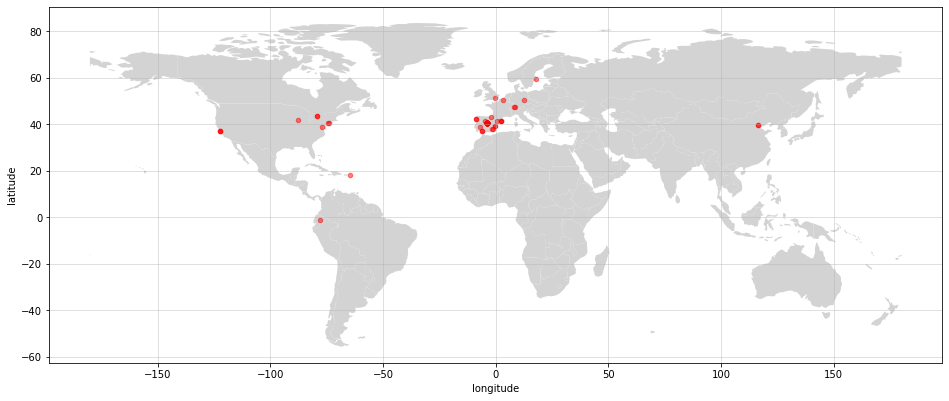

In [93]:
import geopandas as gpd
geofile='110m_cultural/ne_110m_admin_0_countries.shp'

geo = gpd.read_file(geofile)[["ADMIN","ADM0_A3","geometry"]]
pd.set_option('display.max_colwidth', None)
x=geo[geo["ADMIN"]=="Antarctica"].index              #droping the antarctica row since it doesn't add value
geo = geo.drop(index=x)

fig, ax = plt.subplots(figsize=(16,10))
geo.plot(color="lightgrey", ax=ax)

web2.plot(x="longitude", y="latitude", kind="scatter", c="r", alpha=0.5, ax=ax)
ax.grid(b=True, alpha=0.5)
plt.show()

<font color='blue'>Now we can clearly assert that the higher concentration of logins came from the European region, more specifically from Spain. The last step could be to zoom in the Spain coordinates to see on more detail how the logins were distributed there:

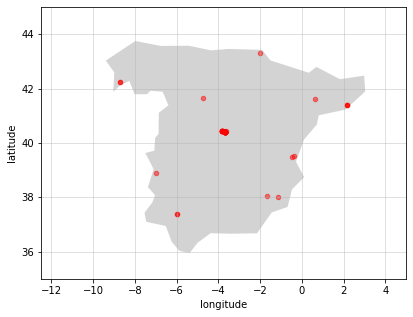

In [91]:
geo = geo[geo["ADMIN"]=="Spain"]
fig, ax = plt.subplots(figsize=(10,5))
geo.plot(color="lightgrey", ax=ax)

web2.plot(x="longitude", y="latitude", kind="scatter", c="r", alpha=0.5, ax=ax)
ax.grid(b=True, alpha=0.5)
ax.set_xlim(-12.5,5)
ax.set_ylim(35,45)
plt.show()